In [77]:
import pickle
import requests
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import diagnostic_plots
import unicodedata

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import KFold
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Lasso
import matplotlib.style as style
style.use('fivethirtyeight')
%matplotlib inline

with open('all_top40.pkl', 'rb') as picklefile:
    df2 = pickle.load(picklefile)

In [78]:
df2 = df2[df2['Pos'] != '1']

In [79]:
df2.shape

(340, 28)

In [80]:
#NO ROOKIES, BETTER FOR LINEAR TRANSFORMATION, NOT LOG

df2 = df2[(df2['Total_games_played'] > 162) & (df2['OPS'] < 1) & (df2['Salary'] > 500000) & (df2['Age'] > 25)]

In [81]:
df2.shape

(210, 28)

In [82]:
## SET UP FINAL TRAIN/TEST

# y = df2.Salary
# X = df2.drop(['Salary'],1)
# X_train, X_FINALTEST, y_train, y_FINALTEST = train_test_split(X, y, test_size=0.3, random_state=55)

In [83]:
df3 = df2.copy(deep=True)

In [84]:
X=patsy.dmatrix('Pos',data=df3,return_type='dataframe')
X.head()

,Intercept,Pos[T.3],Pos[T.4],Pos[T.5],Pos[T.6],Pos[T.7],Pos[T.8],Pos[T.9],Pos[T.D]
Player_Name,,,,,,,,,
A.J. Ellis,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A.J. Pollock,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Aaron Altherr,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Aaron Hicks,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Abraham Almonte,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [85]:
df3=df3.join(X)

In [86]:
df3['First_Base'] = df3['Pos[T.3]']
df3['Second_Base'] = df3['Pos[T.4]']
df3['Third_Base'] = df3['Pos[T.5]']
df3['Shortstop'] = df3['Pos[T.6]']
df3['Left_Field'] = df3['Pos[T.7]']
df3['Center_Field'] = df3['Pos[T.8]']
df3['Right_Field'] = df3['Pos[T.9]']
df3['DH'] = df3['Pos[T.D]']

df3 = df3.drop(['Pos[T.3]','Pos[T.4]','Pos[T.5]','Pos[T.6]','Pos[T.7]','Pos[T.8]','Pos[T.9]','Pos[T.D]'],1)

df3

,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,2B,3B,HR,RBI,...,Pos,Intercept,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Center_Field,Right_Field,DH
Player_Name,,,,,,,,,,,,,,,,,,,,,
A.J. Ellis,1.0,78.571429,282.714286,239.428571,24.000000,56.285714,9.857143,0.428571,6.142857,28.142857,...,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A.J. Pollock,3.0,87.333333,341.166667,310.666667,51.000000,89.000000,20.500000,4.000000,8.833333,33.166667,...,8,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Aaron Altherr,5.0,51.250000,201.250000,178.000000,26.500000,43.250000,10.250000,2.250000,7.000000,27.250000,...,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Aaron Hicks,7.0,91.600000,330.000000,289.400000,38.600000,67.000000,12.200000,1.400000,8.600000,32.200000,...,8,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Abraham Almonte,12.0,60.400000,189.800000,172.400000,23.000000,42.400000,10.800000,2.000000,2.800000,16.800000,...,8,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Adam Duvall,15.0,90.500000,351.000000,319.000000,44.250000,76.750000,18.000000,2.250000,18.000000,54.000000,...,7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Adam Eaton,16.0,90.666667,403.333333,356.833333,58.000000,101.500000,17.166667,5.833333,6.000000,31.666667,...,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Adam Jones,19.0,152.571429,653.428571,610.571429,85.857143,170.428571,28.857143,1.714286,28.714286,86.714286,...,8,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Adeiny Hechavarria,28.0,119.500000,447.166667,418.833333,39.333333,106.833333,15.000000,5.833333,3.666667,34.500000,...,6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [87]:
batters_only = df3.copy(deep=True)

In [88]:
batters_only = batters_only.rename(index=str, columns={"2B": "Doubles", "3B": "Triples"})

Text(0.5,1,'Player Salaries Per Position')

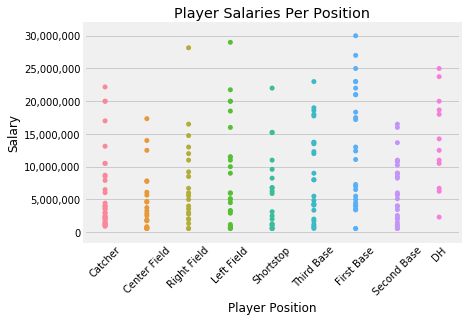

In [89]:
x_ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8]
positions = ['Catcher', 'Center Field', 'Right Field', 'Left Field','Shortstop','Third Base','First Base', 'Second Base', 'DH']
y_ticks = [0, .5e7, 1e7, 1.5e7, 2e7, 2.5e7, 3e7]
salaries = ['0', '5,000,000', '10,000,000', '15,000,000','20,000,000','25,000,000','30,000,000']

sns.stripplot(x="Pos", y="Salary", data=batters_only)
plt.xlabel('Player Position')
plt.xticks(x_ticks, positions, rotation=45)
plt.yticks(y_ticks, salaries)
plt.title("Player Salaries Per Position")

Text(0.5,1,'Player Salaries Per Team')

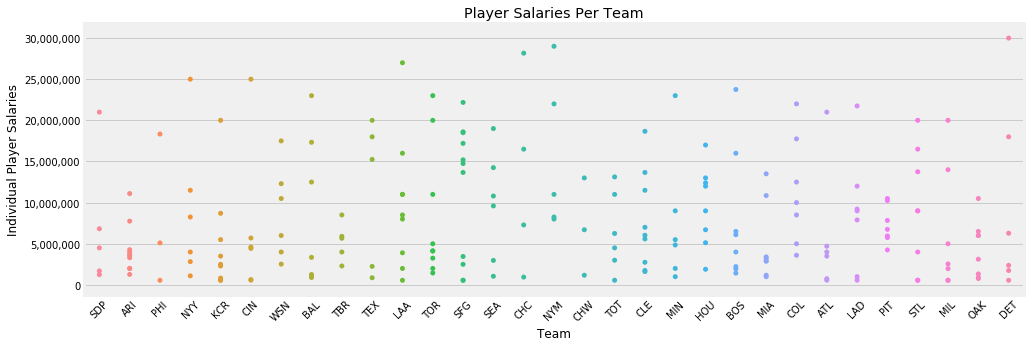

In [90]:
y_ticks = [0, .5e7, 1e7, 1.5e7, 2e7, 2.5e7, 3e7]
salaries = ['0', '5,000,000', '10,000,000', '15,000,000','20,000,000','25,000,000','30,000,000']

fig, ax = plt.subplots(figsize=(15,5))
sns.stripplot(x="Team", y="Salary", data=batters_only, ax=ax)
plt.xticks(rotation=45)
plt.ylabel('Individual Player Salaries')
plt.yticks(y_ticks, salaries)
plt.title("Player Salaries Per Team")

In [91]:
batters_only_df = batters_only[['Runs', 'Hits', 'Doubles', 'Triples', 'HR', 'RBI', 'BA', 'OBP', 'SLG',
                                'OPS', 'SB', 'TB', 'SF', 'Age', 'Total_games_played',
                                'dWAR','All_star_count','First_Base','Second_Base','Third_Base',
                                'Shortstop','Left_Field','Center_Field','Right_Field','DH','Salary']]

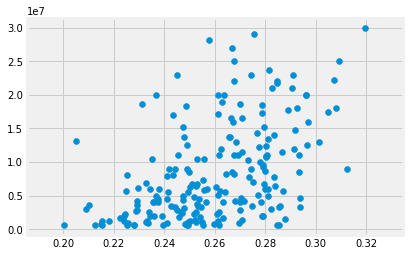

In [92]:
## Remove players below Mendoza line

batters_only_df = batters_only_df[batters_only_df['BA'] > 0.2]

plt.scatter(batters_only_df['BA'], batters_only_df['Salary'])

In [93]:
batters_only_df

,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,OPS,...,All_star_count,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Center_Field,Right_Field,DH,Salary
Player_Name,,,,,,,,,,,,,,,,,,,,,
A.J. Ellis,24.000000,56.285714,9.857143,0.428571,6.142857,28.142857,0.233300,0.336991,0.354413,0.691404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1250000.0
A.J. Pollock,51.000000,89.000000,20.500000,4.000000,8.833333,33.166667,0.273747,0.335573,0.443354,0.778927,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7750000.0
Aaron Hicks,38.600000,67.000000,12.200000,1.400000,8.600000,32.200000,0.229163,0.315112,0.364295,0.679407,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2825000.0
Abraham Almonte,23.000000,42.400000,10.800000,2.000000,2.800000,16.800000,0.248115,0.301156,0.382594,0.683751,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,825000.0
Adam Duvall,44.250000,76.750000,18.000000,2.250000,18.000000,54.000000,0.225049,0.284313,0.451360,0.735673,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,645000.0
Adam Eaton,58.000000,101.500000,17.166667,5.833333,6.000000,31.666667,0.279859,0.362290,0.415633,0.777923,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6000000.0
Adam Jones,85.857143,170.428571,28.857143,1.714286,28.714286,86.714286,0.278898,0.317446,0.472643,0.790088,...,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17333333.0
Adeiny Hechavarria,39.333333,106.833333,15.000000,5.833333,3.666667,34.500000,0.255714,0.290104,0.351886,0.641991,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5900000.0
Adrian Beltre,80.428571,165.571429,30.857143,1.285714,26.285714,90.571429,0.307985,0.360664,0.518487,0.879151,...,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,18000000.0


In [94]:
training_df = batters_only_df.copy(deep=True)

In [95]:
training_df['Salary']

Player_Name
A.J. Ellis             1250000.0
A.J. Pollock           7750000.0
Aaron Hicks            2825000.0
Abraham Almonte         825000.0
Adam Duvall             645000.0
Adam Eaton             6000000.0
Adam Jones            17333333.0
Adeiny Hechavarria     5900000.0
Adrian Beltre         18000000.0
Albert Pujols         27000000.0
Alcides Escobar        2500000.0
Aledmys Diaz           2000000.0
Alex Avila             4000000.0
Alex Gordon           20000000.0
Andrelton Simmons     11000000.0
Andrew McCutchen      14750000.0
Andrew Romine          1050000.0
Anthony Rendon        12300000.0
Anthony Rizzo          7285714.0
Asdrubal Cabrera       8250000.0
Avisail Garcia         6700000.0
Ben Zobrist           16500000.0
Billy Hamilton         4600000.0
Brad Miller            4500000.0
Brandon Belt          17200000.0
Brandon Crawford      15200000.0
Brandon Guyer          2750000.0
Brett Gardner         11500000.0
Brian Dozier           9000000.0
Brian McCann          17000000.

In [96]:
training_df.describe()

,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,OPS,...,All_star_count,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Center_Field,Right_Field,DH,Salary
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,...,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,2.020000e+02
mean,51.583215,101.150389,20.066325,2.230068,12.935372,48.941348,0.259753,0.324591,0.416724,0.741316,...,0.950495,0.128713,0.133663,0.123762,0.094059,0.123762,0.099010,0.099010,0.059406,8.368710e+06
std,20.684818,37.920569,8.042511,1.601319,8.040475,22.510261,0.023463,0.027517,0.052271,0.071554,...,1.344798,0.335714,0.341136,0.330128,0.292637,0.330128,0.299417,0.299417,0.236970,7.133741e+06
min,7.000000,16.500000,3.200000,0.000000,0.833333,7.666667,0.200174,0.256443,0.285281,0.541724,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.590000e+05
25%,35.857143,71.488095,13.714286,0.892857,6.892857,32.050000,0.243691,0.308513,0.382886,0.691596,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.600000e+06
50%,51.550000,102.800000,20.750000,2.000000,11.414286,46.916667,0.261140,0.323008,0.417559,0.743785,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000e+06
75%,67.285714,130.000000,25.964286,3.333333,17.276786,64.598214,0.278834,0.342205,0.448053,0.784688,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.247500e+07
max,101.714286,181.500000,38.714286,8.142857,35.428571,104.857143,0.319681,0.437400,0.557986,0.961231,...,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000e+07


In [97]:
training_df.columns

Index(['Runs', 'Hits', 'Doubles', 'Triples', 'HR', 'RBI', 'BA', 'OBP', 'SLG',
       'OPS', 'SB', 'TB', 'SF', 'Age', 'Total_games_played', 'dWAR',
       'All_star_count', 'First_Base', 'Second_Base', 'Third_Base',
       'Shortstop', 'Left_Field', 'Center_Field', 'Right_Field', 'DH',
       'Salary'],
      dtype='object')

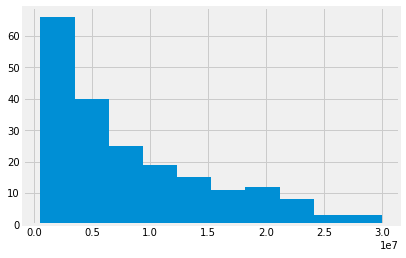

In [98]:
training_df.Salary.hist()

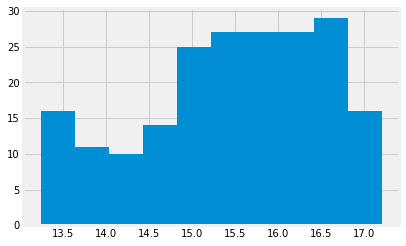

In [99]:
training_df['log_salary'] = np.log(training_df.Salary)

training_df.log_salary.hist()

In [100]:
from scipy import stats

y_transformed, _ = stats.boxcox(training_df.Salary)

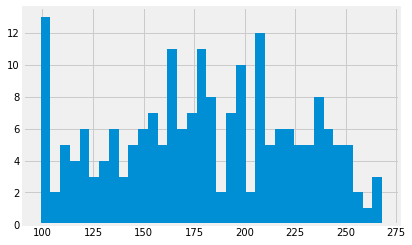

In [101]:
pd.Series(y_transformed).hist(bins=35)

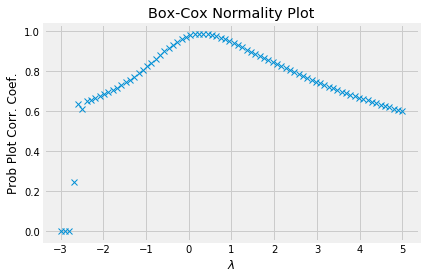

In [102]:
fig = plt.figure()
ax = fig.add_subplot(111)
prob = stats.boxcox_normplot(training_df.Salary, -3, 5, plot=ax)

0.2935990247277316


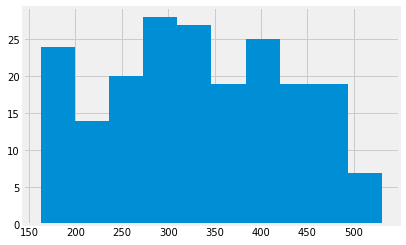

In [103]:
lamb=stats.boxcox_normmax(training_df.Salary, brack=(-1.9, 1.9))
print(lamb)
training_df['y_t'] =(np.power(training_df.Salary,lamb)-1)/lamb

plt.hist(training_df['y_t']);

In [104]:
from scipy.special import inv_boxcox

training_df['real_salary'] = inv_boxcox(training_df['y_t'], lamb)

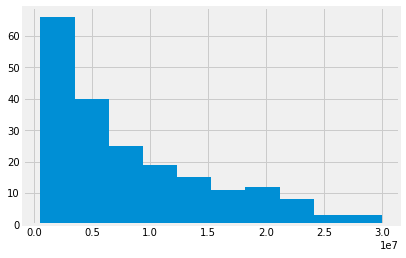

In [105]:
training_df.real_salary.hist()

In [106]:
training_df.loc[:,'rootASC'] = training_df.loc[:,'All_star_count'] ** 0.5

In [107]:
training_df.corr()

,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,OPS,...,Shortstop,Left_Field,Center_Field,Right_Field,DH,Salary,log_salary,y_t,real_salary,rootASC
Runs,1.000000,0.939034,0.908077,0.424116,0.743486,0.863177,0.578899,0.636932,0.689524,0.748637,...,-0.122265,0.058856,-0.072199,0.106020,0.131836,0.699692,0.730822,0.741950,0.699692,0.657130
Hits,0.939034,1.000000,0.941402,0.398313,0.656045,0.859884,0.701693,0.604899,0.641594,0.701306,...,-0.062689,0.007303,-0.114548,0.029814,0.123279,0.709202,0.760727,0.765803,0.709202,0.664708
Doubles,0.908077,0.941402,1.000000,0.291095,0.689376,0.872500,0.635928,0.611356,0.705632,0.750568,...,-0.115823,0.012883,-0.166453,0.019277,0.110085,0.681959,0.721153,0.729400,0.681959,0.642319
Triples,0.424116,0.398313,0.291095,1.000000,-0.050059,0.083031,0.351702,0.180973,0.065689,0.117580,...,0.143304,0.161139,0.164749,0.113534,-0.169460,0.117710,0.211444,0.188680,0.117710,0.149116
HR,0.743486,0.656045,0.689376,-0.050059,1.000000,0.919367,0.275666,0.433635,0.863835,0.797792,...,-0.254685,0.032071,-0.181950,0.058291,0.346949,0.612840,0.596259,0.618084,0.612840,0.559186
RBI,0.863177,0.859884,0.872500,0.083031,0.919367,1.000000,0.493345,0.552397,0.826049,0.815860,...,-0.192342,0.011067,-0.213933,0.031028,0.268998,0.722763,0.719302,0.740676,0.722763,0.662403
BA,0.578899,0.701693,0.635928,0.351702,0.275666,0.493345,1.000000,0.672753,0.539280,0.652658,...,-0.085862,-0.005610,-0.049766,0.001987,0.056827,0.481834,0.493817,0.503346,0.481834,0.494417
OBP,0.636932,0.604899,0.611356,0.180973,0.433635,0.552397,0.672753,1.000000,0.566850,0.798643,...,-0.206795,-0.028771,-0.166022,0.115489,0.085780,0.565779,0.555854,0.573430,0.565779,0.505428
SLG,0.689524,0.641594,0.705632,0.065689,0.863835,0.826049,0.539280,0.566850,1.000000,0.948490,...,-0.298270,0.042712,-0.142807,0.105551,0.300776,0.555955,0.539170,0.559163,0.555955,0.539564
OPS,0.748637,0.701306,0.750568,0.117580,0.797792,0.815860,0.652658,0.798643,0.948490,1.000000,...,-0.297412,0.020137,-0.168166,0.121517,0.252705,0.623702,0.607624,0.628988,0.623702,0.588520


([<matplotlib.axis.YTick at 0x1c1ed0e908>,
 <a list of 7 Text yticklabel objects>)

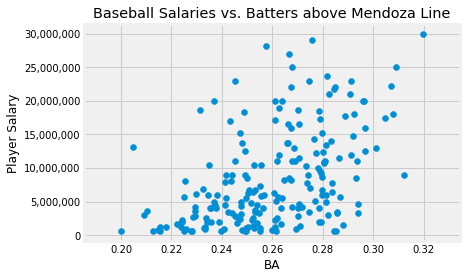

In [108]:
import matplotlib.style as style


y_ticks = [0, .5e7, 1e7, 1.5e7, 2e7, 2.5e7, 3e7]
salaries = ['0', '5,000,000', '10,000,000', '15,000,000','20,000,000','25,000,000','30,000,000']
plt.scatter(training_df['BA'], training_df['Salary'])
plt.title('Baseball Salaries vs. Batters above Mendoza Line')
plt.ylabel('Player Salary')
plt.xlabel('BA');
plt.yticks(y_ticks, salaries)

In [109]:
#X2=patsy.dmatrix('Team',data=training_df,return_type='dataframe')
#X2.head()

In [110]:
#training_df=training_df.join(X2)

In [111]:
#training_df['LAA'] = training_df['Team[T.LAA]']
#training_df['LAD'] = training_df['Team[T.LAD]']
#training_df['PIT'] = training_df['Team[T.PIT]']
#training_df['SDP'] = training_df['Team[T.SDP]']
#training_df['STL'] = training_df['Team[T.STL]']
#training_df['TBR'] = training_df['Team[T.TBR]']
#training_df['TOR'] = training_df['Team[T.TOR]']
#training_df['WSN'] = training_df['Team[T.WSN]']
#training_df['SFG'] = training_df['Team[T.SFG]']
#training_df['NYM'] = training_df['Team[T.NYM]']
#training_df['MIA'] = training_df['Team[T.MIA]']


#training_df = training_df.drop(['Team[T.LAA]','Team[T.LAD]','Team[T.PIT]',
#                                        'Team[T.SDP]','Team[T.STL]','Team[T.TBR]',
#                                        'Team[T.TOR]','Team[T.WSN]','Team[T.SFG]','Team[T.NYM]','Team[T.MIA]'],1)

In [112]:
#training_df['ATL'] = training_df['Team[T.ATL]']
#training_df['BAL'] = training_df['Team[T.BAL]']
#training_df['BOS'] = training_df['Team[T.BOS]']
#training_df['CHC'] = training_df['Team[T.CHC]']
#training_df['CHW'] = training_df['Team[T.CHW]']
#training_df['CIN'] = training_df['Team[T.CIN]']
#training_df['CLE'] = training_df['Team[T.CLE]']
#training_df['COL'] = training_df['Team[T.COL]']
#training_df['HOU'] = training_df['Team[T.HOU]']
#training_df['KCR'] = training_df['Team[T.KCR]']
#training_df['MIL'] = training_df['Team[T.MIL]']
#training_df['MIN'] = training_df['Team[T.MIN]']
#training_df['NYY'] = training_df['Team[T.NYY]']
#training_df['OAK'] = training_df['Team[T.OAK]']
#training_df['PHI'] = training_df['Team[T.PHI]']
#training_df['SEA'] = training_df['Team[T.SEA]']
#training_df['TEX'] = training_df['Team[T.TEX]']
#training_df['TOT'] = training_df['Team[T.TOT]']


#training_df = training_df.drop(['Team[T.ATL]','Team[T.BAL]','Team[T.BOS]',
#                                        'Team[T.CHC]','Team[T.CHW]','Team[T.CIN]',
#                                        'Team[T.CLE]','Team[T.COL]','Team[T.HOU]',
#                                        'Team[T.KCR]','Team[T.MIL]','Team[T.MIN]',
#                                        'Team[T.NYY]','Team[T.OAK]','Team[T.PHI]',
#                                        'Team[T.SEA]','Team[T.TEX]','Team[T.TOT]',
#                                        'Team', 'Intercept'],1)

In [113]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, A.J. Ellis to Yuli Gurriel
Data columns (total 30 columns):
Runs                  202 non-null float64
Hits                  202 non-null float64
Doubles               202 non-null float64
Triples               202 non-null float64
HR                    202 non-null float64
RBI                   202 non-null float64
BA                    202 non-null float64
OBP                   202 non-null float64
SLG                   202 non-null float64
OPS                   202 non-null float64
SB                    202 non-null float64
TB                    202 non-null float64
SF                    202 non-null float64
Age                   202 non-null int64
Total_games_played    202 non-null int64
dWAR                  202 non-null float64
All_star_count        202 non-null float64
First_Base            202 non-null float64
Second_Base           202 non-null float64
Third_Base            202 non-null float64
Shortstop             202 

In [114]:
## SET UP FINAL TRAIN/TEST

y = training_df['y_t']
X = training_df.drop(['y_t'],1)
X_FINALtrain, X_FINALTEST, y_FINALtrain, y_FINALTEST = train_test_split(X, y, test_size=0.3, random_state=13)

In [115]:
REAL_TRAIN_Y = pd.DataFrame(y_FINALtrain)

In [116]:
REAL_TRAIN_Y.reset_index(inplace=True)

In [117]:
## CREATE FULL TRAINING DATASET

X_FINALtrain.reset_index(inplace=True)

final_train = pd.merge(X_FINALtrain, REAL_TRAIN_Y)

final_train = final_train.set_index('Player_Name')

In [118]:
final_train

,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,OPS,...,Shortstop,Left_Field,Center_Field,Right_Field,DH,Salary,log_salary,real_salary,rootASC,y_t
Player_Name,,,,,,,,,,,,,,,,,,,,,
Hunter Pence,73.000000,143.285714,25.285714,4.428571,18.285714,76.857143,0.278555,0.337119,0.452642,0.789762,...,0.0,1.0,0.0,0.0,0.0,18500000.0,16.733281,18500000.0,1.414214,459.912795
Didi Gregorius,46.833333,100.666667,18.000000,2.000000,11.166667,45.000000,0.267518,0.310275,0.388197,0.698472,...,1.0,0.0,0.0,0.0,0.0,8250000.0,15.925724,8250000.0,0.000000,362.112631
Carlos Santana,78.571429,136.571429,31.857143,1.857143,24.000000,80.714286,0.248604,0.363450,0.443787,0.807237,...,0.0,0.0,0.0,0.0,0.0,18333333.0,16.724231,18333333.0,0.000000,458.683378
Chris Taylor,29.500000,54.000000,11.750000,2.000000,5.500000,22.250000,0.239507,0.295520,0.356439,0.651959,...,1.0,0.0,0.0,0.0,0.0,575000.0,13.262125,575000.0,0.000000,163.810157
Christian Vazquez,26.333333,58.333333,12.000000,1.000000,2.333333,21.333333,0.252289,0.305230,0.340344,0.645574,...,0.0,0.0,0.0,0.0,0.0,1425000.0,14.169682,1425000.0,0.000000,214.866701
Freddy Galvis,39.333333,92.500000,15.333333,3.333333,8.666667,38.833333,0.232712,0.274744,0.365312,0.640056,...,1.0,0.0,0.0,0.0,0.0,6825000.0,15.736103,6825000.0,0.000000,342.319377
Ryan Braun,77.142857,141.142857,28.000000,3.571429,24.857143,81.285714,0.296236,0.363221,0.523679,0.886900,...,0.0,1.0,0.0,0.0,0.0,20000000.0,16.811243,20000000.0,1.732051,470.640203
Carlos Gomez,63.000000,110.714286,23.571429,3.428571,16.571429,54.428571,0.256379,0.318212,0.443397,0.761609,...,0.0,0.0,0.0,1.0,0.0,4000000.0,15.201805,4000000.0,1.414214,292.125486
Salvador Perez,47.000000,117.428571,22.000000,1.428571,16.285714,60.428571,0.279780,0.309375,0.448313,0.757688,...,0.0,0.0,0.0,0.0,0.0,8700000.0,15.978834,8700000.0,2.236068,367.856829


In [119]:
#sns.pairplot(final_train)

In [120]:
X_FINALtrain

,Player_Name,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,...,Third_Base,Shortstop,Left_Field,Center_Field,Right_Field,DH,Salary,log_salary,real_salary,rootASC
0,Hunter Pence,73.000000,143.285714,25.285714,4.428571,18.285714,76.857143,0.278555,0.337119,0.452642,...,0.0,0.0,1.0,0.0,0.0,0.0,18500000.0,16.733281,18500000.0,1.414214
1,Didi Gregorius,46.833333,100.666667,18.000000,2.000000,11.166667,45.000000,0.267518,0.310275,0.388197,...,0.0,1.0,0.0,0.0,0.0,0.0,8250000.0,15.925724,8250000.0,0.000000
2,Carlos Santana,78.571429,136.571429,31.857143,1.857143,24.000000,80.714286,0.248604,0.363450,0.443787,...,0.0,0.0,0.0,0.0,0.0,0.0,18333333.0,16.724231,18333333.0,0.000000
3,Chris Taylor,29.500000,54.000000,11.750000,2.000000,5.500000,22.250000,0.239507,0.295520,0.356439,...,0.0,1.0,0.0,0.0,0.0,0.0,575000.0,13.262125,575000.0,0.000000
4,Christian Vazquez,26.333333,58.333333,12.000000,1.000000,2.333333,21.333333,0.252289,0.305230,0.340344,...,0.0,0.0,0.0,0.0,0.0,0.0,1425000.0,14.169682,1425000.0,0.000000
5,Freddy Galvis,39.333333,92.500000,15.333333,3.333333,8.666667,38.833333,0.232712,0.274744,0.365312,...,0.0,1.0,0.0,0.0,0.0,0.0,6825000.0,15.736103,6825000.0,0.000000
6,Ryan Braun,77.142857,141.142857,28.000000,3.571429,24.857143,81.285714,0.296236,0.363221,0.523679,...,0.0,0.0,1.0,0.0,0.0,0.0,20000000.0,16.811243,20000000.0,1.732051
7,Carlos Gomez,63.000000,110.714286,23.571429,3.428571,16.571429,54.428571,0.256379,0.318212,0.443397,...,0.0,0.0,0.0,0.0,1.0,0.0,4000000.0,15.201805,4000000.0,1.414214
8,Salvador Perez,47.000000,117.428571,22.000000,1.428571,16.285714,60.428571,0.279780,0.309375,0.448313,...,0.0,0.0,0.0,0.0,0.0,0.0,8700000.0,15.978834,8700000.0,2.236068
9,James McCann,26.000000,68.500000,10.500000,2.000000,8.000000,34.500000,0.247028,0.284092,0.373049,...,0.0,0.0,0.0,0.0,0.0,0.0,2375000.0,14.680508,2375000.0,0.000000


In [121]:
y_FINALtrain

Player_Name
Hunter Pence          459.912795
Didi Gregorius        362.112631
Carlos Santana        458.683378
Chris Taylor          163.810157
Christian Vazquez     214.866701
Freddy Galvis         342.319377
Ryan Braun            470.640203
Carlos Gomez          292.125486
Salvador Perez        367.856829
James McCann          250.185096
Matt Adams            292.125486
Yan Gomes             330.028392
Ben Zobrist           444.608049
Adrian Beltre         456.200664
Jon Jay               268.189059
Robinson Chirinos     246.191352
Rajai Davis           228.437681
Miguel Cabrera        530.568964
Andrelton Simmons     394.326802
Jake Lamb             297.951331
Stephen Piscotty      210.647034
Bryan Holaday         193.309928
Brett Gardner         399.551631
Daniel Murphy         452.414962
Chris Young           237.707564
Freddie Freeman       477.479664
J.D. Martinez         495.171907
Kolten Wong           292.125486
Eduardo Nunez         292.125486
Kevin Pillar          274.64725

In [122]:
X_FINALtrain['Hits2'] = X_FINALtrain['Hits']**2
X_FINALtrain['rootHR'] = X_FINALtrain['HR']**0.5
X_FINALtrain['RBI2'] = X_FINALtrain['RBI']**2

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [123]:
X_FINALtrain

,Player_Name,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,...,Center_Field,Right_Field,DH,Salary,log_salary,real_salary,rootASC,Hits2,rootHR,RBI2
0,Hunter Pence,73.000000,143.285714,25.285714,4.428571,18.285714,76.857143,0.278555,0.337119,0.452642,...,0.0,0.0,0.0,18500000.0,16.733281,18500000.0,1.414214,20530.795918,4.276180,5907.020408
1,Didi Gregorius,46.833333,100.666667,18.000000,2.000000,11.166667,45.000000,0.267518,0.310275,0.388197,...,0.0,0.0,0.0,8250000.0,15.925724,8250000.0,0.000000,10133.777778,3.341656,2025.000000
2,Carlos Santana,78.571429,136.571429,31.857143,1.857143,24.000000,80.714286,0.248604,0.363450,0.443787,...,0.0,0.0,0.0,18333333.0,16.724231,18333333.0,0.000000,18651.755102,4.898979,6514.795918
3,Chris Taylor,29.500000,54.000000,11.750000,2.000000,5.500000,22.250000,0.239507,0.295520,0.356439,...,0.0,0.0,0.0,575000.0,13.262125,575000.0,0.000000,2916.000000,2.345208,495.062500
4,Christian Vazquez,26.333333,58.333333,12.000000,1.000000,2.333333,21.333333,0.252289,0.305230,0.340344,...,0.0,0.0,0.0,1425000.0,14.169682,1425000.0,0.000000,3402.777778,1.527525,455.111111
5,Freddy Galvis,39.333333,92.500000,15.333333,3.333333,8.666667,38.833333,0.232712,0.274744,0.365312,...,0.0,0.0,0.0,6825000.0,15.736103,6825000.0,0.000000,8556.250000,2.943920,1508.027778
6,Ryan Braun,77.142857,141.142857,28.000000,3.571429,24.857143,81.285714,0.296236,0.363221,0.523679,...,0.0,0.0,0.0,20000000.0,16.811243,20000000.0,1.732051,19921.306122,4.985694,6607.367347
7,Carlos Gomez,63.000000,110.714286,23.571429,3.428571,16.571429,54.428571,0.256379,0.318212,0.443397,...,0.0,1.0,0.0,4000000.0,15.201805,4000000.0,1.414214,12257.653061,4.070802,2962.469388
8,Salvador Perez,47.000000,117.428571,22.000000,1.428571,16.285714,60.428571,0.279780,0.309375,0.448313,...,0.0,0.0,0.0,8700000.0,15.978834,8700000.0,2.236068,13789.469388,4.035556,3651.612245
9,James McCann,26.000000,68.500000,10.500000,2.000000,8.000000,34.500000,0.247028,0.284092,0.373049,...,0.0,0.0,0.0,2375000.0,14.680508,2375000.0,0.000000,4692.250000,2.828427,1190.250000


In [124]:
X, y_t = X_FINALtrain[['OBP','RBI','Age','Total_games_played',
                  'dWAR','rootASC', 'First_Base',
                  'Second_Base','DH']], y_FINALtrain

baseball_log = LinearRegression()
baseball_log_fit = baseball_log.fit(X,y_t)

In [125]:
print(len(X))

141


In [126]:
from sklearn.metrics import r2_score, mean_squared_error

kf = KFold(n=len(X), n_folds=5, shuffle=True, random_state=42)

SE_scores = []
r2_scores = []
for train, test in kf:
    X_train = X.iloc[train]
    y_train = y_t.iloc[train]
    X_test = X.iloc[test]
    y_test = y_t.iloc[test]
    baseball_log.fit(X_train, y_train)
    y_test_predict = baseball_log.predict(X_test)
    score = mean_squared_error(inv_boxcox(y_test_predict, lamb), inv_boxcox(y_test, lamb))
    SE = np.sqrt(score)
    SE_scores.append(SE)
    r2 = r2_score(inv_boxcox(y_test_predict, lamb), inv_boxcox(y_test, lamb))
    r2_scores.append(r2)
    
mean_mse = np.mean(SE_scores)
print('Mean RMSE', np.mean(SE_scores))
print('Mean R^2',np.mean(r2_scores))


Mean RMSE 4402872.053764759
Mean R^2 0.4916135343672427


   test_score  train_score  train_size
0   -8.221594     0.979614          10
1    0.583156     0.796484          34
2    0.622771     0.749040          57
3    0.636772     0.727343          81
4    0.655719     0.723170         105


(-1, 1)

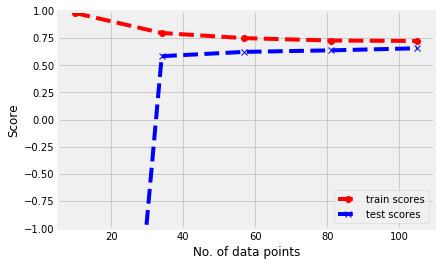

In [127]:
train_sizes, train_scores, test_scores = learning_curve(baseball_log, X, y_t, cv=4)
ave_train_scores = train_scores.mean(axis=1)
ave_test_scores = test_scores.mean(axis=1)

learn_df = pd.DataFrame({
    'train_size': train_sizes,
    'train_score': ave_train_scores,
    'test_score': ave_test_scores
})
print(learn_df)

plt.plot(learn_df['train_size'], learn_df['train_score'], 'r--o', label='train scores')
plt.plot(learn_df['train_size'], learn_df['test_score'], 'b--x', label='test scores')
plt.xlabel('No. of data points')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.ylim(-1,1)

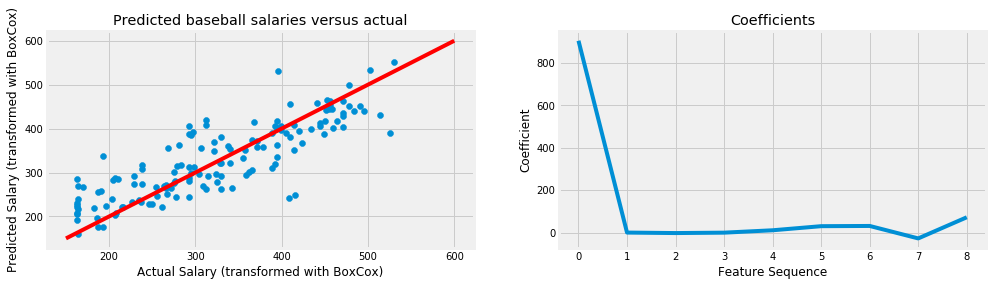

In [128]:
fig = plt.figure(figsize = (15, 4))

#Visualizing predictions versus actuals
y_train_log_predicted = baseball_log.predict(X)

plt.subplot(1, 2, 1)
plt.scatter(y_t, y_train_log_predicted)
plt.plot([150, 600], [150, 600], color='red')
plt.title('Predicted baseball salaries versus actual')
plt.ylabel('Predicted Salary (transformed with BoxCox)')
plt.xlabel('Actual Salary (transformed with BoxCox)');

plt.subplot(1, 2, 2)
plt.plot(baseball_log.coef_)
plt.title('Coefficients')
plt.xlabel('Feature Sequence')
plt.ylabel('Coefficient');

In [129]:
py, pX = patsy.dmatrices('y_t ~ RBI +'
                                'OBP + Age + Total_games_played +'
                                'dWAR + rootASC + First_Base +  Second_Base +'
                                'DH',
                       data=final_train, return_type="dataframe")

boxcoxmodel = sm.OLS(py, pX)
boxcoxfit = boxcoxmodel.fit()
boxcoxfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y_t   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     36.80
Date:                Thu, 19 Jul 2018   Prob (F-statistic):           9.49e-32
Time:                        20:55:36   Log-Likelihood:                -761.73
No. Observations:                 141   AIC:                             1543.
Df Residuals:                     131   BIC:                             1573.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             25.8911     80.229      0.323      0.747    -132.821     184.603
RBI                    0.8351      0.374      2.230      0.027       0.094       1.576
OBP                  574.1195    222.211      2.584      0.011     134.533    1013.706
Age                   -1.7792      1.898     -0.937      0.350      -5.535       1.976
Total_games_played     0.1577      0.031      5.170      0.000       0.097       0.218
dWAR                  13.6009      7.069      1.924      0.057      -0.383      27.585
rootASC               29.1199      9.450      3.081      0.003      10.425      47.815
First_Base            25.8374     16.679      1.549      0.124      -7.158      58.833
Second_Base          -25.2553     14.800     -1.706      0.090     -54.534       4.023
DH                    74.3098     24.989      2.974      0.004      24.876     123.744
==============================================================================
Omnibus:                        3.690   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                4.096
Skew:                           0.116   Prob(JB):                        0.129
Kurtosis:                       3.802   Cond. No.                     3.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

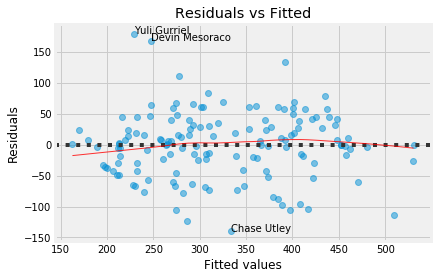

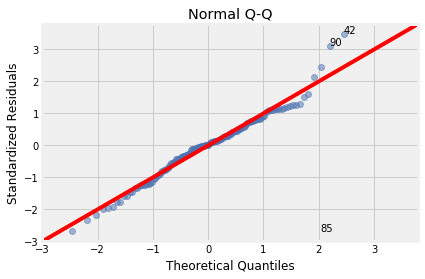

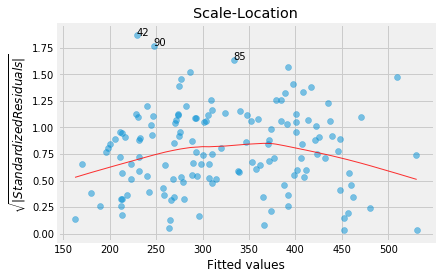

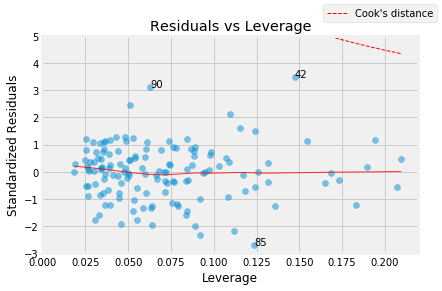

In [130]:
diagnostic_plots.diagnostic_plots(pX, py, boxcoxfit)
plt.figsize=(20,10)

Text(0.5,0,'Fitted Values')

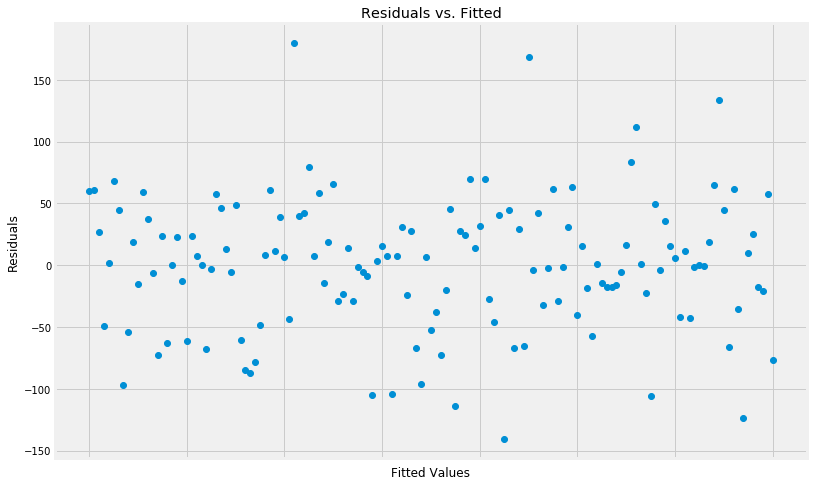

In [131]:



boxcoxfit.resid.plot(style='o', figsize=(12,8))
plt.title('Residuals vs. Fitted')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')

In [132]:
X_FINALtrain

,Player_Name,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,...,Center_Field,Right_Field,DH,Salary,log_salary,real_salary,rootASC,Hits2,rootHR,RBI2
0,Hunter Pence,73.000000,143.285714,25.285714,4.428571,18.285714,76.857143,0.278555,0.337119,0.452642,...,0.0,0.0,0.0,18500000.0,16.733281,18500000.0,1.414214,20530.795918,4.276180,5907.020408
1,Didi Gregorius,46.833333,100.666667,18.000000,2.000000,11.166667,45.000000,0.267518,0.310275,0.388197,...,0.0,0.0,0.0,8250000.0,15.925724,8250000.0,0.000000,10133.777778,3.341656,2025.000000
2,Carlos Santana,78.571429,136.571429,31.857143,1.857143,24.000000,80.714286,0.248604,0.363450,0.443787,...,0.0,0.0,0.0,18333333.0,16.724231,18333333.0,0.000000,18651.755102,4.898979,6514.795918
3,Chris Taylor,29.500000,54.000000,11.750000,2.000000,5.500000,22.250000,0.239507,0.295520,0.356439,...,0.0,0.0,0.0,575000.0,13.262125,575000.0,0.000000,2916.000000,2.345208,495.062500
4,Christian Vazquez,26.333333,58.333333,12.000000,1.000000,2.333333,21.333333,0.252289,0.305230,0.340344,...,0.0,0.0,0.0,1425000.0,14.169682,1425000.0,0.000000,3402.777778,1.527525,455.111111
5,Freddy Galvis,39.333333,92.500000,15.333333,3.333333,8.666667,38.833333,0.232712,0.274744,0.365312,...,0.0,0.0,0.0,6825000.0,15.736103,6825000.0,0.000000,8556.250000,2.943920,1508.027778
6,Ryan Braun,77.142857,141.142857,28.000000,3.571429,24.857143,81.285714,0.296236,0.363221,0.523679,...,0.0,0.0,0.0,20000000.0,16.811243,20000000.0,1.732051,19921.306122,4.985694,6607.367347
7,Carlos Gomez,63.000000,110.714286,23.571429,3.428571,16.571429,54.428571,0.256379,0.318212,0.443397,...,0.0,1.0,0.0,4000000.0,15.201805,4000000.0,1.414214,12257.653061,4.070802,2962.469388
8,Salvador Perez,47.000000,117.428571,22.000000,1.428571,16.285714,60.428571,0.279780,0.309375,0.448313,...,0.0,0.0,0.0,8700000.0,15.978834,8700000.0,2.236068,13789.469388,4.035556,3651.612245
9,James McCann,26.000000,68.500000,10.500000,2.000000,8.000000,34.500000,0.247028,0.284092,0.373049,...,0.0,0.0,0.0,2375000.0,14.680508,2375000.0,0.000000,4692.250000,2.828427,1190.250000


In [133]:
## RETRAIN ON X_train, Y_train
## THEN TEST ON X_FINALTEST, Y_FINALTEST

In [134]:
X_FINALtrain.shape

(141, 33)

In [135]:
## CHANGE THIS TO FINAL FEATURES

X_FINALtrain = X_FINALtrain[['OBP','RBI','Age','Total_games_played',
                  'dWAR','rootASC', 'First_Base',
                  'Second_Base','DH']]

In [136]:
y_FINALtrain.shape

(141,)

In [137]:
## CHANGE THIS TO FINAL FEATURES

X_FINALTEST = X_FINALTEST[['OBP','RBI','Age','Total_games_played',
                  'dWAR','rootASC', 'First_Base',
                  'Second_Base','DH']]

In [138]:
X_FINALTEST.shape

(61, 9)

In [139]:
y_FINALTEST.shape

(61,)

In [159]:
def regression_scores(x,y):
    Final_mse_scores =[]
    final_r2_scores = []
    y_test_predict = baseball_log.predict(x)
    score = mean_squared_error(inv_boxcox(y_test_predict, lamb), inv_boxcox(y, lamb))
    rmse = score**0.5
    Final_mse_scores.append(rmse)
    r2 = r2_score(y_test_predict, y)
    final_r2_scores.append(r2)

    y_ticks = [0, .5e7, 1e7, 1.5e7, 2e7, 2.5e7, 3e7]
    salaries = ['0', '5,000,000', '10,000,000', '15,000,000','20,000,000','25,000,000','30,000,000']
    plt.subplot(1, 1, 1)
    plt.scatter(inv_boxcox(y, lamb), inv_boxcox(y_test_predict, lamb))
    
    
    plt.title('Predicted baseball salaries versus actual')
    plt.ylabel('Predicted Salary')
    plt.xlabel('Actual Salary')
    plt.yticks(y_ticks, salaries)
    plt.xticks(y_ticks, salaries, rotation=30)
    plt.plot([0, 3e7], [0, 3e7], color='red');
    
    mean_mse = np.mean(Final_mse_scores)
    return ('Mean RMSE', np.mean(Final_mse_scores), 'Mean R^2',np.mean(final_r2_scores))

In [160]:
baseball_log.fit(X_FINALtrain, y_FINALtrain)

print(baseball_log.score(X_FINALtrain, y_FINALtrain))
print(baseball_log.score(X_FINALTEST, y_FINALTEST))

0.716596422379376
0.5721591593243018


('Mean RMSE', 4096244.5445069126, 'Mean R^2', 0.6045143838708912)

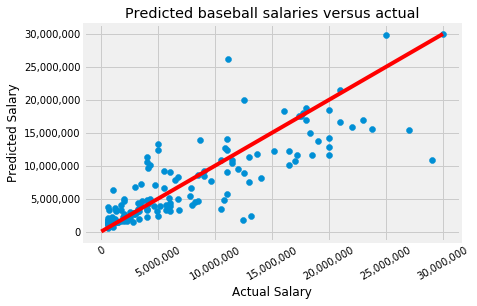

In [161]:

regression_scores(X_FINALtrain,y_FINALtrain)

('Mean RMSE', 5639591.382262987, 'Mean R^2', 0.5284678920318702)

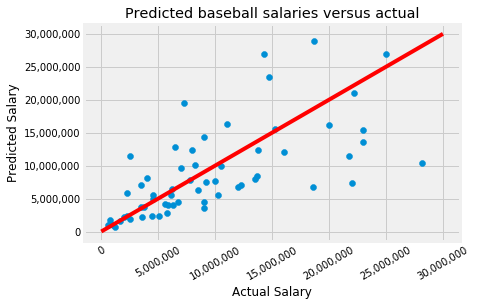

In [143]:
regression_scores(X_FINALTEST,y_FINALTEST)

In [144]:
training_df

,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,OPS,...,Shortstop,Left_Field,Center_Field,Right_Field,DH,Salary,log_salary,y_t,real_salary,rootASC
Player_Name,,,,,,,,,,,,,,,,,,,,,
A.J. Ellis,24.000000,56.285714,9.857143,0.428571,6.142857,28.142857,0.233300,0.336991,0.354413,0.691404,...,0.0,0.0,0.0,0.0,0.0,1250000.0,14.038654,206.629262,1250000.0,0.000000
A.J. Pollock,51.000000,89.000000,20.500000,4.000000,8.833333,33.166667,0.273747,0.335573,0.443354,0.778927,...,0.0,0.0,1.0,0.0,0.0,7750000.0,15.863203,355.464405,7750000.0,1.000000
Aaron Hicks,38.600000,67.000000,12.200000,1.400000,8.600000,32.200000,0.229163,0.315112,0.364295,0.679407,...,0.0,0.0,1.0,0.0,0.0,2825000.0,14.854019,263.438409,2825000.0,0.000000
Abraham Almonte,23.000000,42.400000,10.800000,2.000000,2.800000,16.800000,0.248115,0.301156,0.382594,0.683751,...,0.0,0.0,1.0,0.0,0.0,825000.0,13.623139,182.507312,825000.0,0.000000
Adam Duvall,44.250000,76.750000,18.000000,2.250000,18.000000,54.000000,0.225049,0.284313,0.451360,0.735673,...,0.0,1.0,0.0,0.0,0.0,645000.0,13.377006,169.546340,645000.0,1.000000
Adam Eaton,58.000000,101.500000,17.166667,5.833333,6.000000,31.666667,0.279859,0.362290,0.415633,0.777923,...,0.0,0.0,0.0,1.0,0.0,6000000.0,15.607270,329.486477,6000000.0,0.000000
Adam Jones,85.857143,170.428571,28.857143,1.714286,28.714286,86.714286,0.278898,0.317446,0.472643,0.790088,...,0.0,0.0,1.0,0.0,0.0,17333333.0,16.668142,451.136090,17333333.0,2.000000
Adeiny Hechavarria,39.333333,106.833333,15.000000,5.833333,3.666667,34.500000,0.255714,0.290104,0.351886,0.641991,...,1.0,0.0,0.0,0.0,0.0,5900000.0,15.590463,327.847847,5900000.0,0.000000
Adrian Beltre,80.428571,165.571429,30.857143,1.285714,26.285714,90.571429,0.307985,0.360664,0.518487,0.879151,...,0.0,0.0,0.0,0.0,0.0,18000000.0,16.705882,456.200664,18000000.0,1.732051


In [145]:
training_df.reset_index(inplace=True)

In [146]:
training_df

,Player_Name,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,...,Shortstop,Left_Field,Center_Field,Right_Field,DH,Salary,log_salary,y_t,real_salary,rootASC
0,A.J. Ellis,24.000000,56.285714,9.857143,0.428571,6.142857,28.142857,0.233300,0.336991,0.354413,...,0.0,0.0,0.0,0.0,0.0,1250000.0,14.038654,206.629262,1250000.0,0.000000
1,A.J. Pollock,51.000000,89.000000,20.500000,4.000000,8.833333,33.166667,0.273747,0.335573,0.443354,...,0.0,0.0,1.0,0.0,0.0,7750000.0,15.863203,355.464405,7750000.0,1.000000
2,Aaron Hicks,38.600000,67.000000,12.200000,1.400000,8.600000,32.200000,0.229163,0.315112,0.364295,...,0.0,0.0,1.0,0.0,0.0,2825000.0,14.854019,263.438409,2825000.0,0.000000
3,Abraham Almonte,23.000000,42.400000,10.800000,2.000000,2.800000,16.800000,0.248115,0.301156,0.382594,...,0.0,0.0,1.0,0.0,0.0,825000.0,13.623139,182.507312,825000.0,0.000000
4,Adam Duvall,44.250000,76.750000,18.000000,2.250000,18.000000,54.000000,0.225049,0.284313,0.451360,...,0.0,1.0,0.0,0.0,0.0,645000.0,13.377006,169.546340,645000.0,1.000000
5,Adam Eaton,58.000000,101.500000,17.166667,5.833333,6.000000,31.666667,0.279859,0.362290,0.415633,...,0.0,0.0,0.0,1.0,0.0,6000000.0,15.607270,329.486477,6000000.0,0.000000
6,Adam Jones,85.857143,170.428571,28.857143,1.714286,28.714286,86.714286,0.278898,0.317446,0.472643,...,0.0,0.0,1.0,0.0,0.0,17333333.0,16.668142,451.136090,17333333.0,2.000000
7,Adeiny Hechavarria,39.333333,106.833333,15.000000,5.833333,3.666667,34.500000,0.255714,0.290104,0.351886,...,1.0,0.0,0.0,0.0,0.0,5900000.0,15.590463,327.847847,5900000.0,0.000000
8,Adrian Beltre,80.428571,165.571429,30.857143,1.285714,26.285714,90.571429,0.307985,0.360664,0.518487,...,0.0,0.0,0.0,0.0,0.0,18000000.0,16.705882,456.200664,18000000.0,1.732051
9,Albert Pujols,76.714286,152.571429,27.571429,0.142857,29.428571,98.285714,0.266756,0.325505,0.468979,...,0.0,0.0,0.0,0.0,0.0,27000000.0,17.111347,514.303984,27000000.0,1.000000


In [147]:
Wil = training_df[training_df['Player_Name'] == 'Giancarlo Stanton']

Wil[['OBP','RBI','Age','Total_games_played',
                  'dWAR','rootASC', 'First_Base',
                  'Second_Base','DH', 'Salary']]

,OBP,RBI,Age,Total_games_played,dWAR,rootASC,First_Base,Second_Base,DH,Salary
81,0.360754,87.571429,27,886,-0.042857,2.0,0.0,0.0,1.0,25000000.0


In [148]:
Wil = Wil[['OBP','RBI','Age','Total_games_played',
                  'dWAR','rootASC', 'First_Base',
                  'Second_Base','DH']]

In [149]:
inv_boxcox(baseball_log.predict(Wil), lamb)

array([29848072.48697415])

In [150]:
baseball_log.predict(Wil)

array([529.77359384])

In [151]:
inv_boxcox(574, lamb) / 10

3915530.1024334542

In [152]:
training_df.Total_games_played.describe()

count     202.000000
mean      659.980198
std       261.438842
min       164.000000
25%       453.500000
50%       683.000000
75%       880.500000
max      1105.000000
Name: Total_games_played, dtype: float64